### Anamoly Detection for GES data

In [1]:
# Load your libraries into working evnironment: 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')
cwd = os.getcwd()
cwd

'C:\\Users\\zelkelani\\Box Sync\\github\\anamoly-detection'

In [80]:
! pip install sklearn
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

  Stored in directory: C:\Users\zelkelani\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [2]:
#change directory to where I have the data:
os.chdir("C:\\Users\\zelkelani\\Box Sync\\github\\anamoly-detection\\GES")

In [3]:
#List the files where I have the data in:
os.listdir('.')

['first_cut.dta']

### Parametric Outlier Detection: 
- What we are trying to do is to detect outliers
    - This kernel aims to handle outlier detection with respect to the distribution they are pulled from. 
        - Common parametric methods use the standard deviation and interquartile range.

In [93]:
df = pd.read_stata('first_cut.dta')

In [94]:
df.head()

,deaths,injuries,location,yield,density,bypass,average
0,4650.0,16270.0,"Cairns, QLD Australia",5,1000.0,NaN,36018.667969
1,4550.0,15170.0,"Killeen, TX United States",5,1000.0,NaN,36018.667969
2,18690.0,51910.0,Saint-Etienne France,5,1000.0,NaN,36018.667969
3,13400.0,24270.0,"Erie, PA United States",5,1000.0,NaN,36018.667969
4,10090.0,21510.0,Lahti Finland,5,1000.0,NaN,36018.667969


In [95]:
df.dtypes

deaths      float64
injuries    float64
location     object
yield         int16
density     float32
bypass      float32
average     float32
dtype: object

In [96]:
df.describe()

,deaths,injuries,yield,density,bypass,average
count,1.219300e+04,1.219300e+04,12204.000000,12204.000000,648.0,1.155600e+04
mean,3.233824e+05,4.350814e+05,1902.111111,7995.575195,1.0,7.869591e+05
std,4.777378e+05,6.653887e+05,4138.707055,4311.640137,0.0,6.291768e+05
min,0.000000e+00,0.000000e+00,5.000000,1000.000000,1.0,3.601867e+04
25%,6.436000e+04,1.188500e+05,30.000000,4000.000000,1.0,3.167567e+05
50%,1.734300e+05,2.457900e+05,400.000000,8000.000000,1.0,6.174540e+05
75%,4.028000e+05,4.888600e+05,1500.000000,12000.000000,1.0,1.080100e+06
max,8.726740e+06,9.743170e+06,20000.000000,15000.000000,1.0,3.979101e+06


In [62]:
print(df.isnull().sum())

deaths         11
injuries       11
location        0
yield           0
density         0
bypass      11556
average       648
dtype: int64


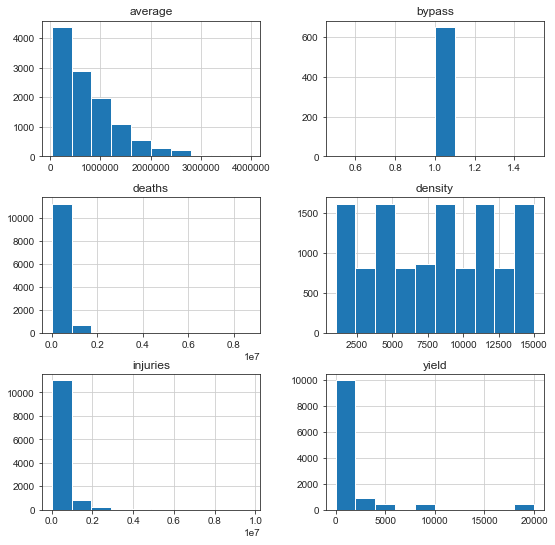

In [63]:
df.hist(figsize=(9,9));

#### From Kaggle:
https://www.kaggle.com/kevinarvai/outlier-detection-practice-uni-multivariate
We use made functions that Define two functions that statistically identify outliers in a pandas Series using a standard deviation and interquartile range method.



In [64]:
def out_std(s, nstd=3.0, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    param nstd:
        Set number of standard deviations from the mean
        to consider an outlier
    :type nstd: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    data_mean, data_std = s.mean(), s.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    if return_thresholds:
        return lower, upper
    else:
        return [True if x < lower or x > upper else False for x in s]

In [65]:
def out_iqr(s, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

In [66]:
# outlier_mask is a boolean list identifies the indices of the outliers
outlier_mask = out_std(df['deaths'], nstd=3.0)
# first 10 elements
outlier_mask[:10]

[False, False, False, False, False, False, False, False, False, False]

In [67]:
df['deaths'][outlier_mask]

5782     1953270.0
6233     2252910.0
6670     2496530.0
6766     1922140.0
6964     1758990.0
7010     1833620.0
7138     2723830.0
7207     2100030.0
7392     1834810.0
7425     1865210.0
7451     1962190.0
7567     2885430.0
7593     1793000.0
7670     2273610.0
7835     1925310.0
7893     1952200.0
7904     2075340.0
8017     1883510.0
8031     3041700.0
8119     2444040.0
8309     2010910.0
8342     2030410.0
8366     2172460.0
8489     1964140.0
8497     3180090.0
8579     2579160.0
8766     2078290.0
8786     2098350.0
8810     2259590.0
8942     3299220.0
           ...    
11993    2728800.0
12009    1959370.0
12012    7139800.0
12015    2511410.0
12024    1798900.0
12025    7139800.0
12027    1912320.0
12028    5853530.0
12037    2511410.0
12044    1959370.0
12085    5732010.0
12092    8082030.0
12095    2334140.0
12097    1773310.0
12101    3741400.0
12109    2257190.0
12148    1773120.0
12158    3571240.0
12168    2524840.0
12171    1816770.0
12184    1773120.0
12185    222

In [71]:
#print(df['deaths'].isnull())
#df2 = df.dropna(how='all')
df3 = df.fillna(0)

In [72]:
df3

,deaths,injuries,location,yield,density,bypass,average
0,4650.0,16270.0,"Cairns, QLD Australia",5,1000.0,0.0,3.601867e+04
1,4550.0,15170.0,"Killeen, TX United States",5,1000.0,0.0,3.601867e+04
2,18690.0,51910.0,Saint-Etienne France,5,1000.0,0.0,3.601867e+04
3,13400.0,24270.0,"Erie, PA United States",5,1000.0,0.0,3.601867e+04
4,10090.0,21510.0,Lahti Finland,5,1000.0,0.0,3.601867e+04
5,10280.0,36990.0,"Buffalo, NY United States",5,1000.0,0.0,3.601867e+04
6,7290.0,25250.0,"Brownsville, TX United States",5,1000.0,0.0,3.601867e+04
7,6940.0,23750.0,"Barrie, ON Canada",5,1000.0,0.0,3.601867e+04
8,8490.0,19740.0,"St. Cloud, MN United States",5,1000.0,0.0,3.601867e+04
9,14100.0,28990.0,"Bloomington, IN United States",5,1000.0,0.0,3.601867e+04


In [73]:
def plot_cutoff(dataframe, col, nstd=2.0, color='red'):
    """
    Version 8 update: more generic function.
    Function added in Version 6, more readable code than previous versions.
    From version 4 update: 
    This code block will plot lower and upper thresholds.
    I'm still thinking about how to best visualize this, suggestions welcome!
    """
    lower, upper = out_std(dataframe[col], nstd=nstd, return_thresholds=True)
    plt.axvspan(min(dataframe[col][dataframe[col] < lower], default=dataframe[col].min()), lower, alpha=0.2, color=color);
    plt.axvspan(upper, max(dataframe[col][dataframe[col] > upper], default=dataframe[col].max()), alpha=0.2, color=color);

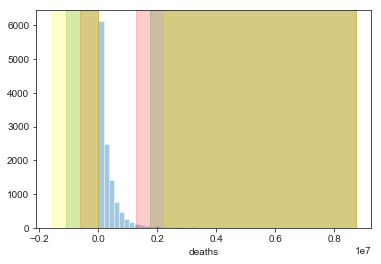

In [74]:
column = 'deaths'
sns.distplot(df3[column], kde=False)
plot_cutoff(df3, column, nstd=2.0, color='red');
plot_cutoff(df3, column, nstd=3.0, color='green');
plot_cutoff(df3, column, nstd=4.0, color='yellow');

### Non-Parametric Detection:
Some of the features in this dataset are skewed, they should serve as a good distributions to test nonparametric outlier detection method.

In [102]:
# for this exercise, just fill missing values with the median value for a column.
# Using median ensures filled values will be whole number
df.fillna(df.median(), inplace=True)

In [116]:
# we only choose certain variables:
cols = ['average', 'deaths']

In [117]:
cols

['average', 'deaths']

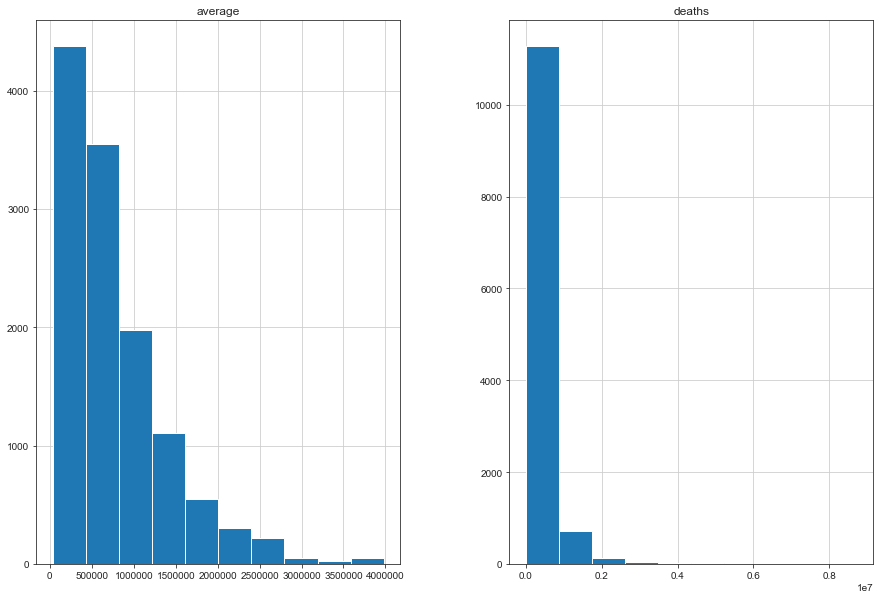

In [118]:
df[cols].hist(figsize=(15,10));

#### DBSCAN - Density-Based Spatial Clustering of Applications with Noise
For skewed distributions a quick and dirty method called DBSCAN. Here is a good tutorial for other methods in scikit-learn. This is a quick nonparametric method that can be used in multivariate analyses. Parameters that will significantly affect clusters and worth tuning are eps and min_samples.

In [119]:
# scale data first
X = StandardScaler().fit_transform(df[cols].values)

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

In [120]:
pd.Series(labels).value_counts()


 0    12202
-1        2
dtype: int64

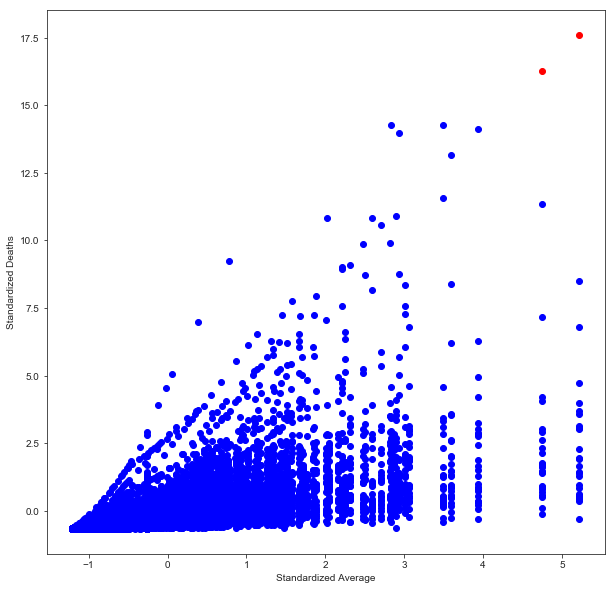

In [122]:
plt.figure(figsize=(10,10))

unique_labels = set(labels)
colors = ['blue', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.xlabel('Standardized Average');
plt.ylabel('Standardized Deaths');